In [1]:
!pip install wfdb numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.9 MB/s  0:00:00m 13.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [wfdb]


Files created: heart_trace.dat (Signal) and heart_trace.hea (Metadata)


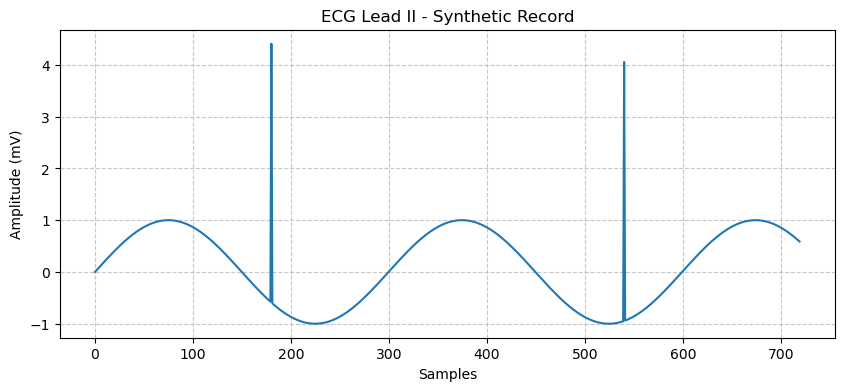

In [3]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Synthetic ECG Data
# We'll create 2 seconds of data at 360Hz (typical for clinical ECG)
fs = 360
duration = 2
t = np.linspace(0, duration, duration * fs)

# A very basic "heartbeat" simulation using sine waves and peaks
# In a real scenario, this would be your raw sensor data
ecg_signal = np.sin(2 * np.pi * 1.2 * t)  # Base rhythm
for i in range(duration):
    ecg_signal[int((i + 0.5) * fs)] += 5 # Simulate the R-peak (the heartbeat)

# 2. Define Metadata
# WFDB needs to know the physical units and the names of the "leads"
signal_name = 'Lead_II'
units = 'mV'

# 3. Save as a WFDB Record
# This creates two files: 'heart_trace.dat' (binary) and 'heart_trace.hea' (header)
wfdb.wrsamp('heart_trace', 
            fs=fs, 
            units=[units], 
            sig_name=[signal_name], 
            p_signal=ecg_signal.reshape(-1, 1), 
            fmt=['16'])

print("Files created: heart_trace.dat (Signal) and heart_trace.hea (Metadata)")

# 4. Read the record back to verify
record = wfdb.rdrecord('heart_trace')

# 5. Visualize
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal)
plt.title("ECG Lead II - Synthetic Record")
plt.xlabel("Samples")
plt.ylabel(f"Amplitude ({record.units[0]})")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()